In [150]:
# Import dependencies
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report



In [151]:
# View data features and target
data = load_breast_cancer()
print(data.feature_names)
print(data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [152]:

# Create dataframe from features and target and preview
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target
df.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [153]:
df.groupby('target').count()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212
1,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357


Per documentation, there are 212 malignant cases and 357 benign cases. Therefore 0 is malignant and 1 is benign.

In [154]:
# Look at dataframe info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [155]:
# remove spaces from column headings and replace with _ and preview
df.columns = df.columns.str.replace(' ', '_')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [156]:
# Save dataframe to csv to use in SQL
# df.to_csv('Resources/df.csv', index=False)

In [157]:
# Define X, y for trian test split and see how many are in each set
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
print("X_train.shape, y_train.shape", X_train.shape, y_train.shape)
print("X_test.shape, y_test.shape", X_test.shape, y_test.shape)


X_train.shape, y_train.shape (426, 30) (426,)
X_test.shape, y_test.shape (143, 30) (143,)


In [158]:
# Create StandardScaler model and fit to training data
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [159]:
# Random forest classifier scores
clf = RandomForestClassifier(random_state=78, n_estimators=500).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=data.target_names))
print(f'Training Score Accuracy: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score Accuracy: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

   malignant       0.95      0.97      0.96        59
      benign       0.98      0.96      0.97        84

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143

Training Score Accuracy: 1.0
Testing Score Accuracy: 0.965034965034965


In [160]:
# Extremely Random Trees Classifier scores
etclf = ExtraTreesClassifier(random_state=78, n_estimators=500).fit(X_train_scaled, y_train)
y_pred_et = etclf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_et, target_names=data.target_names))
print(f'Training Score Accuracy: {etclf.score(X_train_scaled, y_train)}')
print(f'Testing Score Accuracy: {etclf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

   malignant       0.95      0.95      0.95        59
      benign       0.96      0.96      0.96        84

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Training Score Accuracy: 1.0
Testing Score Accuracy: 0.958041958041958


In [161]:
# Adaptive Boosting Classifier scores
adaclf = AdaBoostClassifier(random_state=78,n_estimators=500, base_estimator=DecisionTreeClassifier(max_depth=2)).fit(X_train_scaled, y_train)
y_pred_ada = adaclf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_ada, target_names=data.target_names))
print(f'Training Score Accuracy: {adaclf.score(X_train_scaled, y_train)}')
print(f'Testing Score Accuracy: {adaclf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

   malignant       0.95      0.97      0.96        59
      benign       0.98      0.96      0.97        84

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143

Training Score Accuracy: 1.0
Testing Score Accuracy: 0.965034965034965


[0.03222421 0.0124326  0.04492485 0.0381656  0.00541174 0.0114657
 0.06515245 0.15437053 0.00337557 0.00348631 0.01979885 0.00448491
 0.01223459 0.03947139 0.00298409 0.00402747 0.00489262 0.00531188
 0.00349852 0.00361056 0.0737422  0.01585761 0.12443119 0.07866274
 0.01057741 0.01633734 0.05754753 0.13801028 0.00654546 0.00696379]


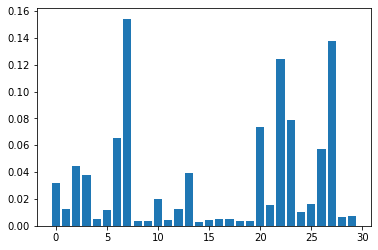

In [162]:
# Run feature importances for random forest info
clf = RandomForestClassifier(random_state=78, n_estimators=500).fit(X_train_scaled, y_train)
features = clf.feature_importances_
print(features)
plt.bar(x=range(len(features)), height=features)
plt.show()

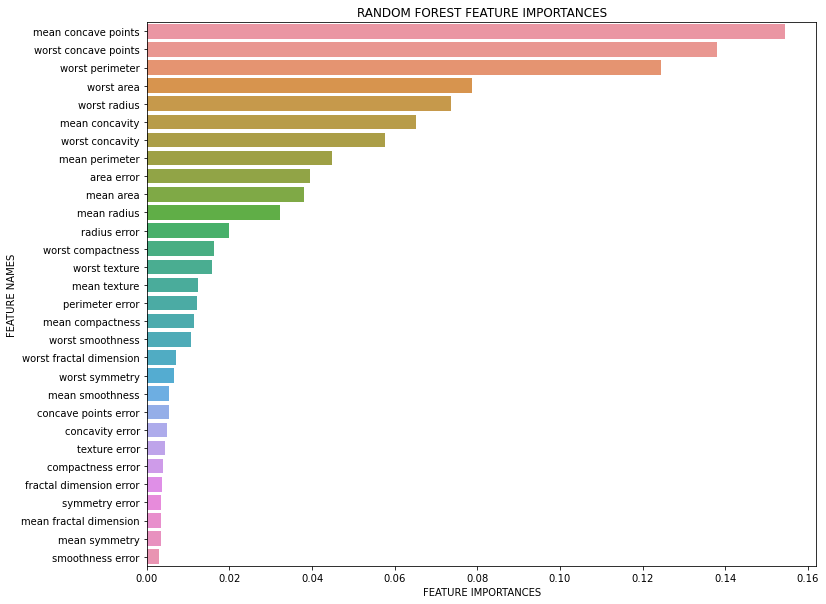

In [163]:
# Plot random forest feature importance in Seaborn
import seaborn as sns
names = data.feature_names
def plot_feature_importance(features,names,model_type):

    # Create arrays for feature importances and names
    feature_importances = np.array(features)
    feature_names = np.array(names)

    # Create a DataFrame from Dictionary
    data={'feature_names':feature_names,'feature_importances':feature_importances}
    featimp_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    featimp_df.sort_values(by=['feature_importances'], ascending=False,inplace=True)

    # Set chart size
    plt.figure(figsize=(12,10))
    
    # Plot Seaborn chart from feature importances and names
    sns.barplot(x=featimp_df['feature_importances'], y=featimp_df['feature_names'])
    
    # Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCES')
    plt.xlabel('FEATURE IMPORTANCES')
    plt.ylabel('FEATURE NAMES')
    
plot_feature_importance(features, names, 'RANDOM FOREST ')





In [164]:
from sklearn.feature_selection import SelectFromModel

In [165]:
# Which variables are strongest
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([False, False,  True,  True, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True,  True, False, False,  True,
        True, False, False])

In [166]:
# Do train/test split on new feature selection
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=78)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [167]:
# Scores using logistic regression model on full data set
lrclf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {lrclf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {lrclf.score(X_test_scaled, y_test)}')

Training Score: 0.9906103286384976
Testing Score: 0.9790209790209791


In [168]:
# Scores using RandomForest Feature Selection
fsclf = LogisticRegression()
fsclf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {fsclf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {fsclf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9647887323943662
Testing Score: 0.9300699300699301
